# Introduction

Mobile phones come in all sorts of prices, features, specifications and all. Price estimation and prediction is an important part of consumer strategy. Deciding on the correct price of a product is very important for the market success of a product. A new product that has to be launched, must have the correct price so that consumers find it appropriate to buy the product.

# Problem Statement

To predict the price range of a mobile phone. The data contains information regarding mobile phone features, specifications etc and their price range. The various features and information can be used to predict the price range of a mobile phone.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Reading of dataset

In [2]:
data=pd.read_csv(r"C:\EB\Final Project\train_data.csv")
data.head()

,id,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,807,1,0.5,1,0,0,37,0.2,127,...,245,829,2319,5,4,4,0,0,0,1
1,2,1065,1,0.5,0,0,1,14,0.7,89,...,188,928,3078,10,1,18,1,0,1,2
2,3,1171,1,1.7,1,2,0,19,0.3,167,...,248,755,263,6,5,8,0,0,0,0
3,4,609,1,3.0,0,15,1,44,0.3,117,...,58,1253,2581,15,11,15,1,0,1,1
4,5,1193,1,2.3,0,7,0,20,1.0,158,...,1442,1904,1958,7,5,2,1,0,0,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1400 non-null   int64  
 1   battery_power  1400 non-null   int64  
 2   bluetooth      1400 non-null   int64  
 3   clock_speed    1400 non-null   float64
 4   dual_sim       1400 non-null   int64  
 5   fc             1400 non-null   int64  
 6   four_g         1400 non-null   int64  
 7   int_memory     1400 non-null   int64  
 8   m_dep          1400 non-null   float64
 9   mobile_wt      1400 non-null   int64  
 10  n_cores        1400 non-null   int64  
 11  pc             1400 non-null   int64  
 12  px_height      1400 non-null   int64  
 13  px_width       1400 non-null   int64  
 14  ram            1400 non-null   int64  
 15  sc_h           1400 non-null   int64  
 16  sc_w           1400 non-null   int64  
 17  talk_time      1400 non-null   int64  
 18  three_g 

In [4]:
data.shape

(1400, 22)

In [5]:
data.price_range.value_counts() 

1    350
2    350
0    350
3    350
Name: price_range, dtype: int64

# Data Cleaning

In [6]:
l=data["id"]
l

0          1
1          2
2          3
3          4
4          5
        ... 
1395    1396
1396    1397
1397    1398
1398    1399
1399    1400
Name: id, Length: 1400, dtype: int64

In [7]:
mob_data=data.drop(['id'], axis=1)
mob_data.head()

,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,807,1,0.5,1,0,0,37,0.2,127,4,...,245,829,2319,5,4,4,0,0,0,1
1,1065,1,0.5,0,0,1,14,0.7,89,2,...,188,928,3078,10,1,18,1,0,1,2
2,1171,1,1.7,1,2,0,19,0.3,167,7,...,248,755,263,6,5,8,0,0,0,0
3,609,1,3.0,0,15,1,44,0.3,117,1,...,58,1253,2581,15,11,15,1,0,1,1
4,1193,1,2.3,0,7,0,20,1.0,158,7,...,1442,1904,1958,7,5,2,1,0,0,2


# Missing Value Treatment

Missing values are usually represented in the form of Nan or null or None in the dataset.

In [8]:
mob_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1400 non-null   int64  
 1   bluetooth      1400 non-null   int64  
 2   clock_speed    1400 non-null   float64
 3   dual_sim       1400 non-null   int64  
 4   fc             1400 non-null   int64  
 5   four_g         1400 non-null   int64  
 6   int_memory     1400 non-null   int64  
 7   m_dep          1400 non-null   float64
 8   mobile_wt      1400 non-null   int64  
 9   n_cores        1400 non-null   int64  
 10  pc             1400 non-null   int64  
 11  px_height      1400 non-null   int64  
 12  px_width       1400 non-null   int64  
 13  ram            1400 non-null   int64  
 14  sc_h           1400 non-null   int64  
 15  sc_w           1400 non-null   int64  
 16  talk_time      1400 non-null   int64  
 17  three_g        1400 non-null   int64  
 18  touch_sc

In [9]:
mob_data.isnull().sum()

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [10]:
#Remove the data points with missing data
mob_data_f = mob_data[mob_data['sc_w'] != 0]
mob_data_f.shape

(1276, 21)

# Data Type Conversion

In [11]:
mob_data_f.dtypes

battery_power      int64
bluetooth          int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

# Label Encoder

Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form.

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [13]:
mob_data_f.battery_power=le.fit_transform(mob_data_f.battery_power)

In [14]:
mob_data_f.bluetooth=le.fit_transform(mob_data_f.bluetooth)

In [15]:
mob_data_f.battery_power.value_counts()

794    5
77     4
287    4
627    4
203    4
      ..
316    1
591    1
119    1
596    1
333    1
Name: battery_power, Length: 874, dtype: int64

In [16]:
mob_data_f.bluetooth.value_counts()

1    647
0    629
Name: bluetooth, dtype: int64

In [17]:
mob_data_f.dtypes

battery_power      int64
bluetooth          int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

# Exploratory Data Analysis (EDA)

In [18]:
mob_data_f.skew()

battery_power    0.023699
bluetooth       -0.028249
clock_speed      0.158978
dual_sim         0.000000
fc               1.061322
four_g          -0.081669
int_memory       0.066551
m_dep            0.084648
mobile_wt       -0.030716
n_cores         -0.029976
pc               0.045808
px_height        0.654526
px_width         0.031901
ram             -0.000004
sc_h            -0.128919
sc_w             0.662084
talk_time        0.006666
three_g         -1.205159
touch_screen    -0.037669
wifi            -0.069088
price_range     -0.016020
dtype: float64

# Correlation

In [19]:
x=mob_data_f.corr()
x

,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,-0.003565,0.005420,-0.046991,0.021736,0.028544,0.006901,0.044438,0.021853,-0.017810,...,-0.013950,-0.007997,0.001132,-0.028019,-0.018282,0.058074,0.006225,-0.003661,0.005654,0.195348
bluetooth,-0.003565,1.000000,0.043958,-0.001568,-0.014205,-0.011557,0.022142,-0.004980,-0.026344,0.051186,...,-0.010005,-0.028540,0.019699,-0.009435,-0.016202,0.018587,-0.045083,0.004438,-0.008329,0.006854
clock_speed,0.005420,0.043958,1.000000,0.004006,-0.022518,-0.008297,-0.000558,0.005163,0.003277,-0.007766,...,-0.000148,0.002970,-0.018746,-0.042018,-0.009298,-0.011112,-0.026799,0.052383,-0.011893,-0.021327
dual_sim,-0.046991,-0.001568,0.004006,1.000000,-0.012710,-0.009412,-0.002372,0.002153,0.000553,-0.002415,...,-0.001552,0.036019,0.062861,-0.005545,-0.011640,-0.014444,-0.034759,0.009406,0.025093,0.037107
fc,0.021736,-0.014205,-0.022518,-0.012710,1.000000,-0.018963,-0.040908,-0.016456,0.011467,-0.028517,...,0.014964,0.005239,-0.006512,-0.007226,0.015149,-0.011048,0.003212,-0.022933,0.010131,-0.002291
four_g,0.028544,-0.011557,-0.008297,-0.009412,-0.018963,1.000000,0.025071,-0.055330,0.021100,-0.029581,...,-0.007069,0.005759,-0.024694,0.038833,0.024770,-0.065537,0.588809,0.011785,-0.035939,-0.012340
int_memory,0.006901,0.022142,-0.000558,-0.002372,-0.040908,0.025071,1.000000,-0.017206,-0.060900,-0.020671,...,-0.030512,-0.020931,0.025228,0.023074,-0.009918,-0.008219,0.006206,-0.002606,0.006445,0.039866
m_dep,0.044438,-0.004980,0.005163,0.002153,-0.016456,-0.055330,-0.017206,1.000000,0.032231,-0.004648,...,0.047354,0.041478,-0.012488,-0.025123,-0.007579,0.016651,-0.038490,-0.002873,-0.035872,0.010475
mobile_wt,0.021853,-0.026344,0.003277,0.000553,0.011467,0.021100,-0.060900,0.032231,1.000000,-0.019822,...,0.024427,0.006862,-0.009125,-0.020312,-0.035125,-0.023781,0.014318,-0.016183,-0.012720,-0.035872
n_cores,-0.017810,0.051186,-0.007766,-0.002415,-0.028517,-0.029581,-0.020671,-0.004648,-0.019822,1.000000,...,0.020605,0.053240,-0.017298,-0.025482,0.000893,-0.002123,-0.006161,0.045139,-0.009307,-0.005655


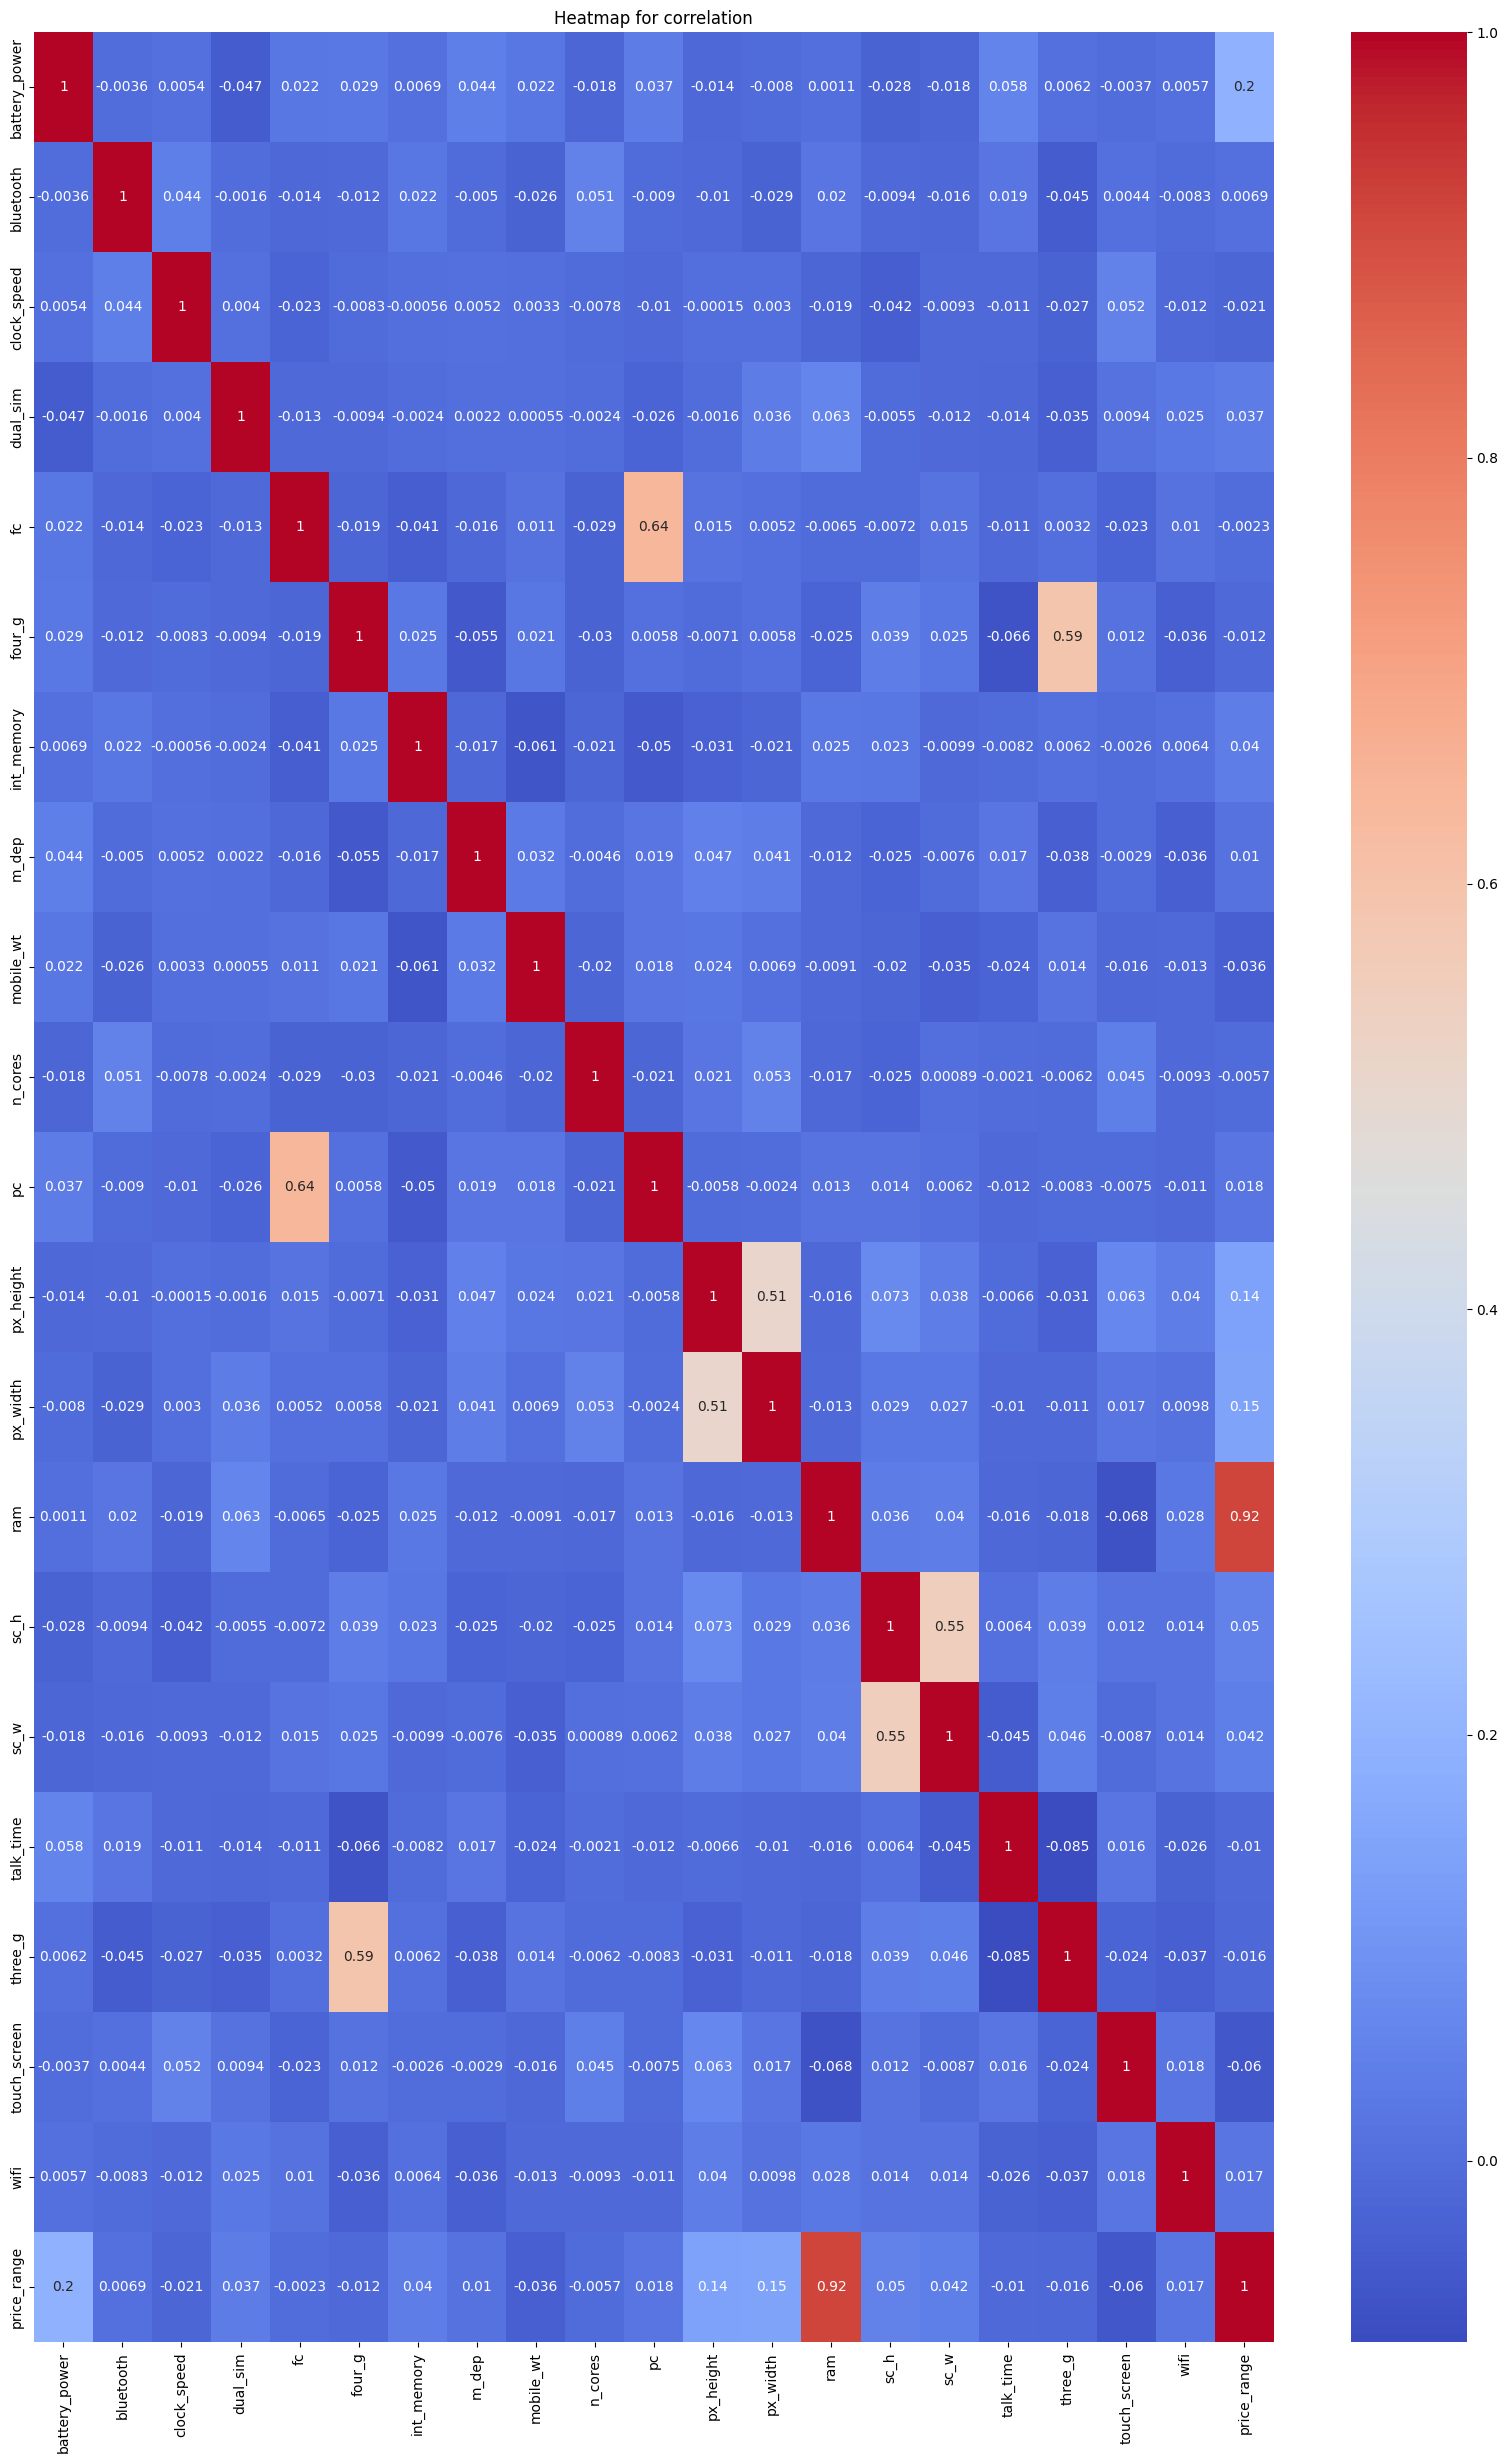

In [20]:
plt.figure(figsize=(20,30))
heatmap=sns.heatmap(x,cmap="coolwarm",annot=True)
plt.title("Heatmap for correlation")
plt.show()

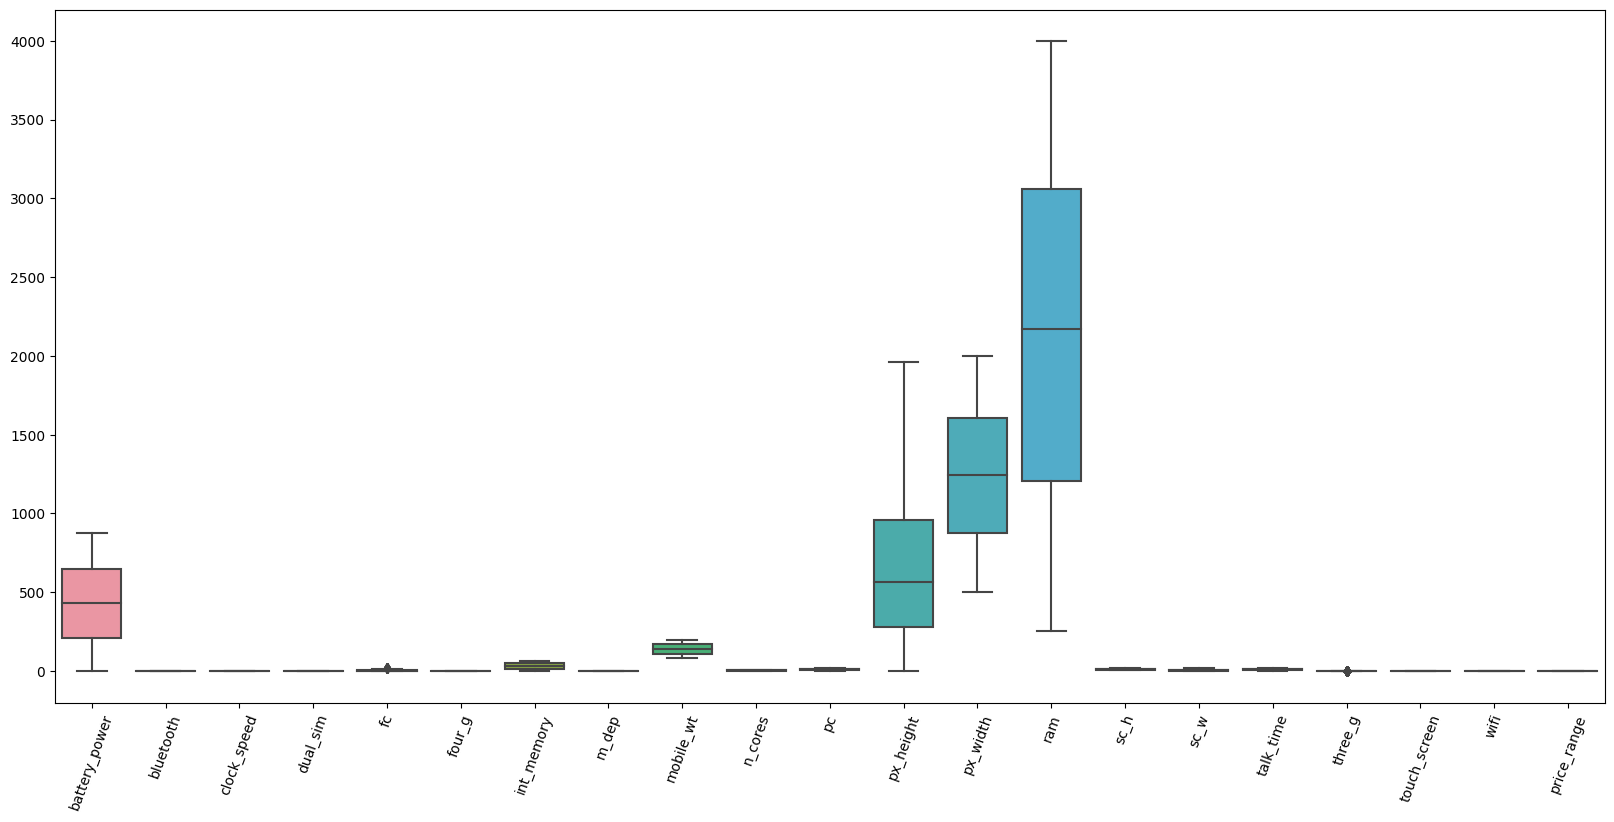

In [21]:
plt.figure(figsize=(20,9))
sns.boxplot(data=mob_data_f)
plt.xticks(rotation=70)
plt.show()

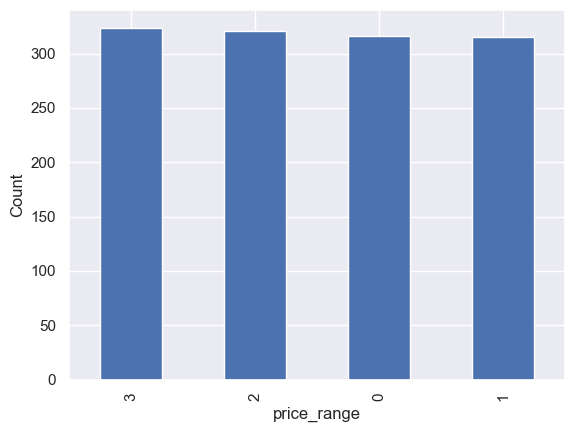

In [22]:
sns.set()
price_plot=mob_data_f['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

So, there are mobile phones in 4 price ranges. The number of elements is almost similar.

# Data Distribution

First, we see how the battery_power mAh is spread.

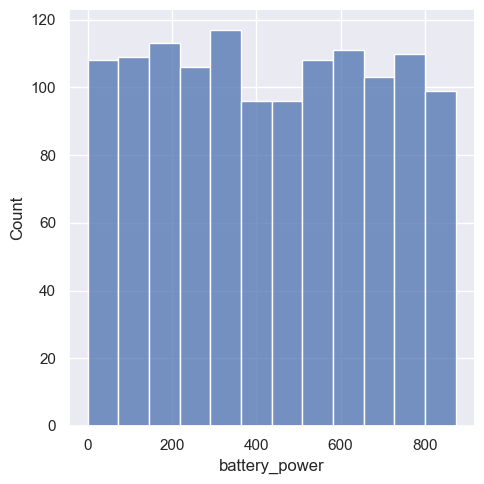

In [23]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=mob_data_f["battery_power"])
plt.show()

Now, we see the count of how many devices have Bluetooth and how many don’t.

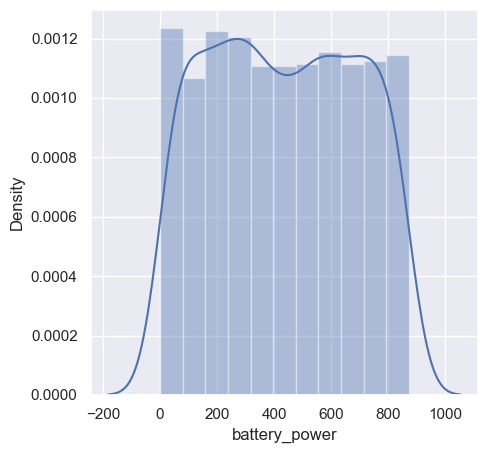

In [24]:
sns.distplot(mob_data_f.battery_power)
plt.show()

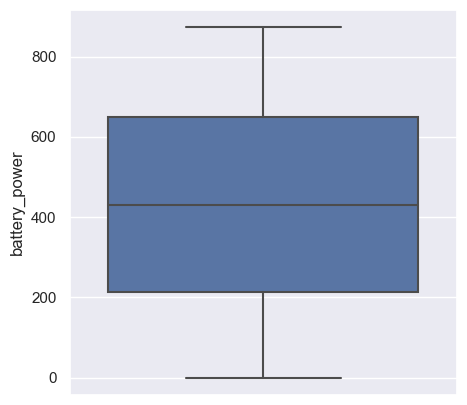

In [25]:
sns.boxplot(data=mob_data_f,y='battery_power')
plt.show()

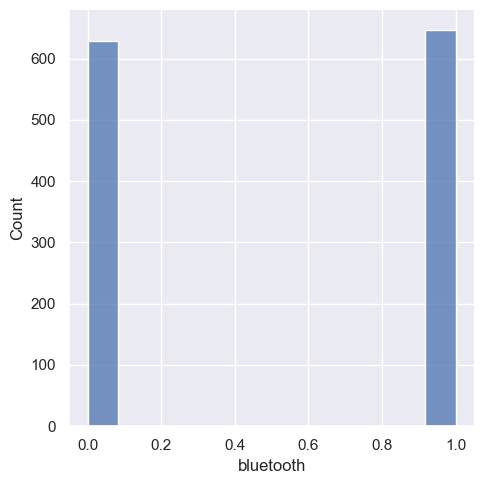

In [26]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=mob_data_f["bluetooth"])
plt.show()

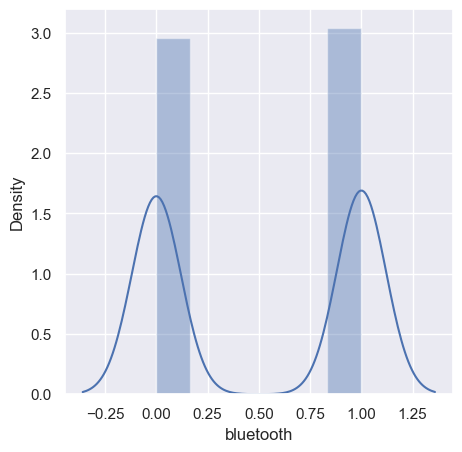

In [27]:
sns.distplot(mob_data_f.bluetooth)
plt.show()

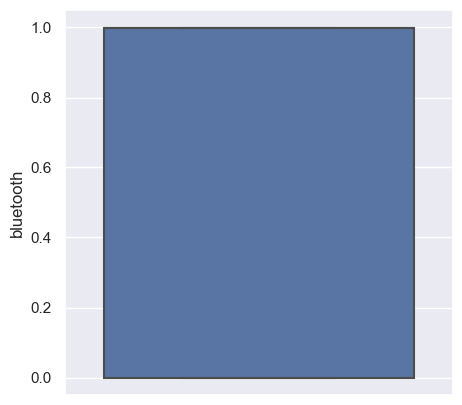

In [28]:
sns.boxplot(data=mob_data_f,y='bluetooth')
plt.show()

Next, we analyse the mobile depth ( in cm).

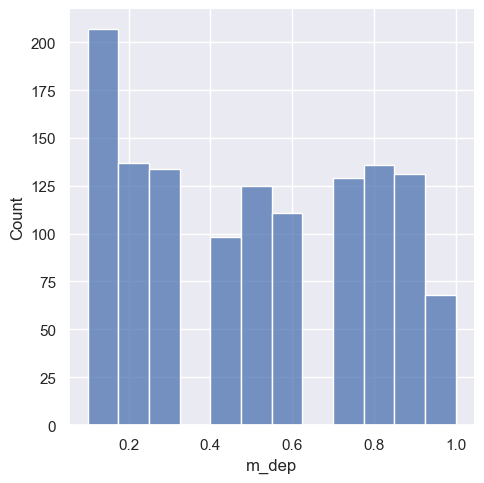

In [29]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=mob_data_f["m_dep"])
plt.show()

A few mobiles are very thin and a few ones are almost a cm thick.

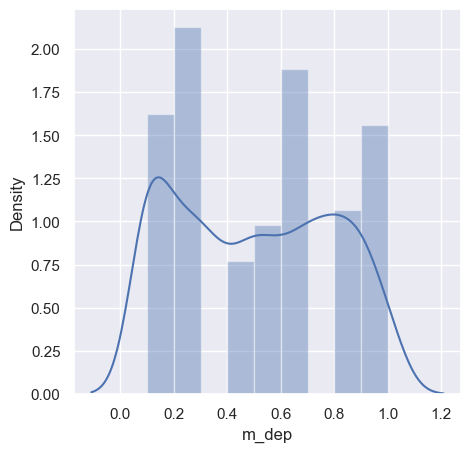

In [30]:
sns.distplot(mob_data_f.m_dep)
plt.show()

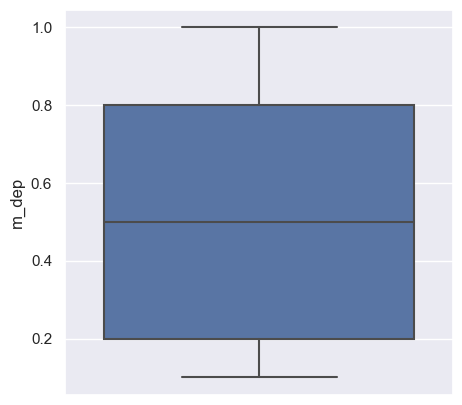

In [31]:
sns.boxplot(data=mob_data_f,y='m_dep')
plt.show()

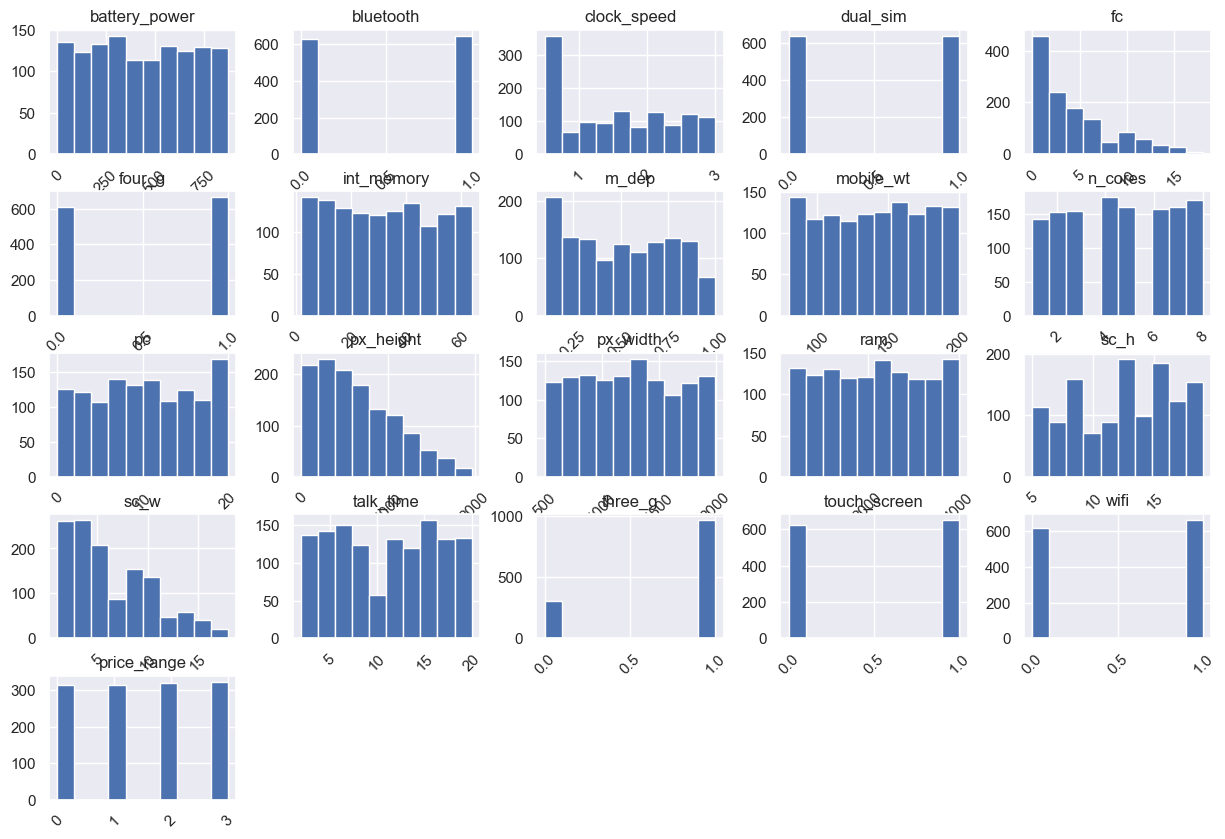

In [32]:
mob_data_f.hist(figsize=(15,10),xrot=45)
plt.xticks(rotation=70)
plt.show()

# Creating Base Model

In a similar way, the data distribution can be analysed for all the data features. Implementing that will be very simple. Let us see if there are any missing values or missing data.

In [33]:
mob_data_f.shape

(1276, 21)

In [34]:
x=mob_data_f.drop(['price_range'], axis=1)
y=mob_data_f['price_range']
# missing values
x.isna().any()

battery_power    False
bluetooth        False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
dtype: bool

# Split the data

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=7)

Now, we define a function for creating confusion matrix.

In [36]:
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

Now, as the function is defined, we can proceed with implementing the classification algorithms.

# 1) Random Forest Classifier :-

A random forest is a supervised machine learning method built from decision tree techniques. This algorithm is used to anticipate behaviour and results in a variety of sectors, including banking and e-commerce.A random forest is a machine learning approach for solving regression and classification issues. It makes use of ensemble learning, which is a technique that combines multiple classifiers to solve complicated problems. The Random Forest Algorithm based on Decision Tree Algorithm

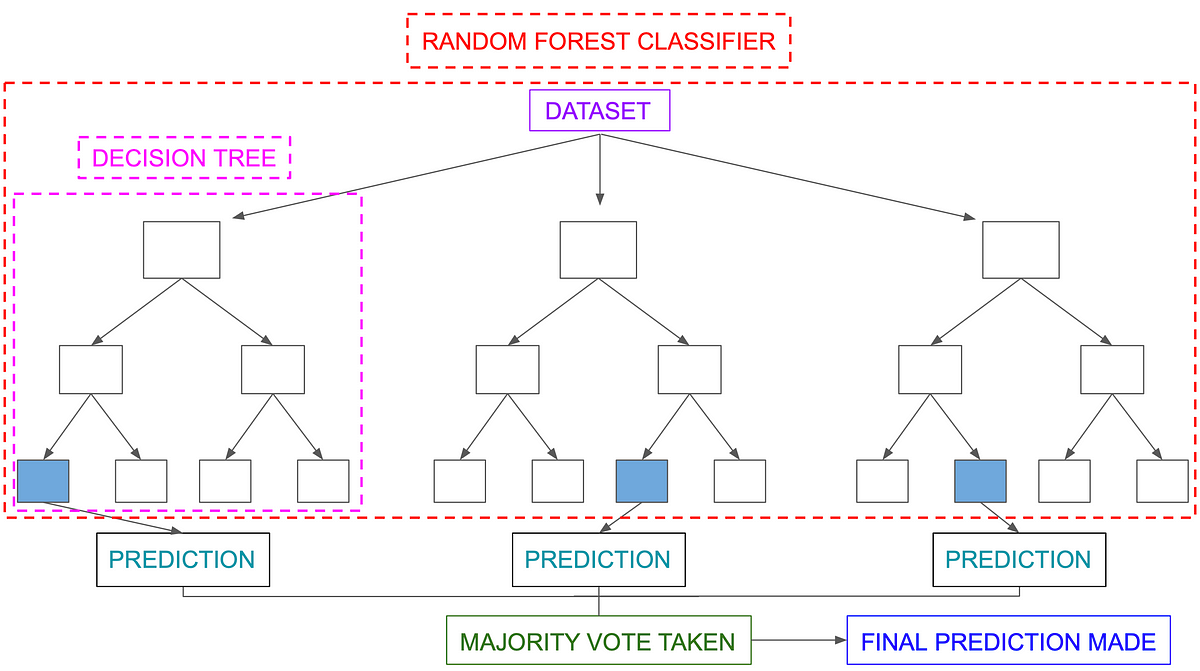

In [37]:
#building the model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,
                           max_depth= 7,
                           max_features= 15,
                           min_samples_leaf= 3,
                           min_samples_split= 10,
                           n_estimators= 200,
                           random_state=7)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, max_features=15, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=200, random_state=7)

In [38]:
y_pred_rfc=rfc.predict(x_test)

Random Forest Classifier Accuracy Score:  0.90234375
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        64
           1       0.90      0.87      0.89        71
           2       0.82      0.86      0.84        59
           3       0.95      0.90      0.93        62

    accuracy                           0.90       256
   macro avg       0.90      0.90      0.90       256
weighted avg       0.90      0.90      0.90       256



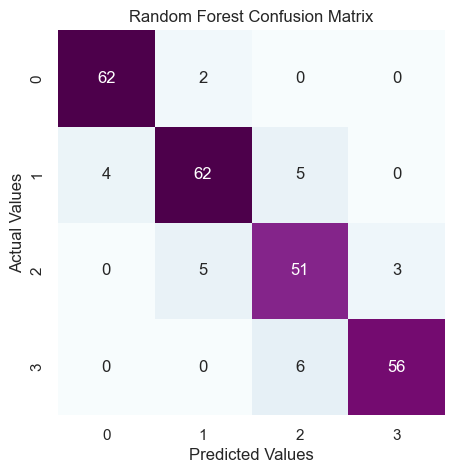

In [39]:
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_rfc))
cm_rfc=my_confusion_matrix(y_test, y_pred_rfc, 'Random Forest Confusion Matrix')

# 2) SVM Classifier :-

Support Vector Machine, or SVM, is a prominent Supervised Learning technique that is used for both classification and regression issues. However, it is mostly utilised in Machine Learning for Classification purposes.

The SVM algorithm’s purpose is to find the optimum line or decision boundary for categorising n-dimensional space so that we may simply place fresh data points in the proper category in the future. A hyperplane is the optimal choice boundary.

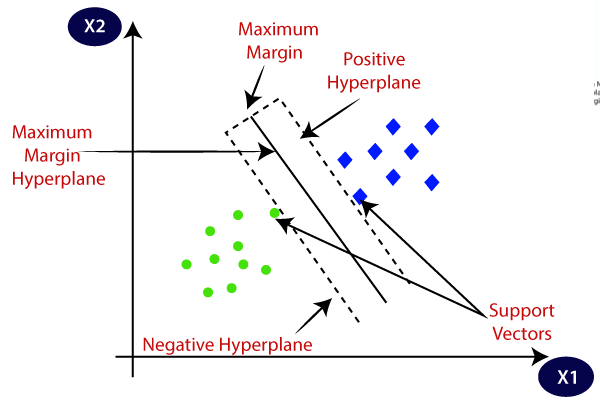

In [40]:
from sklearn import svm
svm_clf = svm.SVC(decision_function_shape='ovo')
svm_clf.fit(x_train, y_train)

SVC(decision_function_shape='ovo')

In [41]:
y_pred_svm=svm_clf.predict(x_test)

SVM Classifier Accuracy Score:  0.94140625
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        64
           1       0.93      0.96      0.94        71
           2       0.92      0.83      0.88        59
           3       0.92      0.97      0.94        62

    accuracy                           0.94       256
   macro avg       0.94      0.94      0.94       256
weighted avg       0.94      0.94      0.94       256



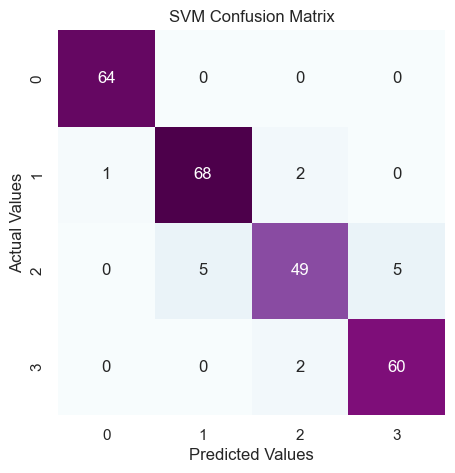

In [42]:
print('SVM Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_svm))
cm_svm=my_confusion_matrix(y_test, y_pred_svm, 'SVM Confusion Matrix')

We can see that the SVM classifier is giving the best accuracy.

# 3) Naive Bayes Classifier :-

Conditional probability is the foundation of Bayes’ theorem. The conditional probability aids us in assessing the likelihood of something occurring if something else has previously occurred. Gaussian Naive Bayes is a Naive Bayes variation that allows continuous data and follows the Gaussian normal distribution.

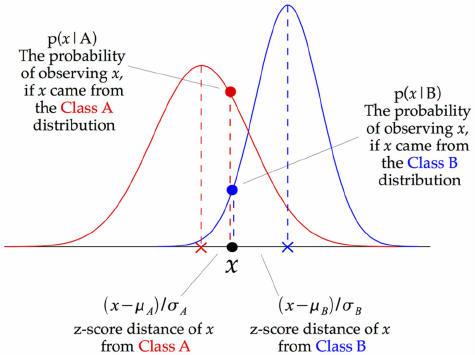

In [43]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [44]:
y_pred_gnb=gnb.predict(x_test)

Gaussian NB Classifier Accuracy Score:  0.8046875
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        64
           1       0.74      0.73      0.74        71
           2       0.69      0.73      0.71        59
           3       0.89      0.90      0.90        62

    accuracy                           0.80       256
   macro avg       0.81      0.81      0.81       256
weighted avg       0.81      0.80      0.81       256



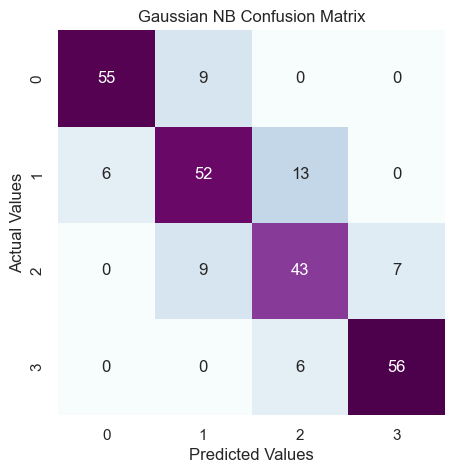

In [45]:
print('Gaussian NB Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_gnb))
cm_gnb=my_confusion_matrix(y_test, y_pred_gnb, 'Gaussian NB Confusion Matrix')

We can see that the model is performing well.

# 4) Decision Tree Classifier :-

The decision tree classifier creates the classification model by building a decision tree. Each node in the tree specifies a test on an attribute, each branch descending from that node corresponds to one of the possible values for that attribute.

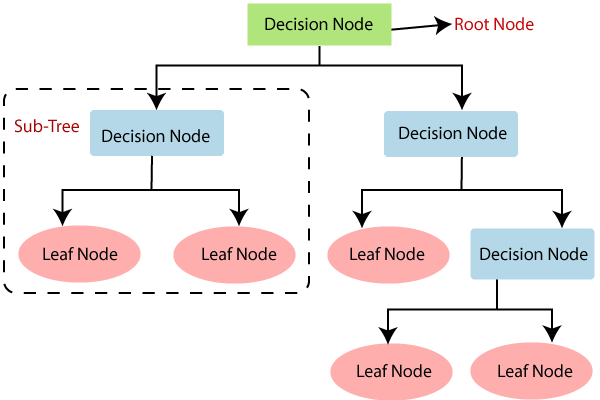

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtc =  DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [47]:
y_pred_dtc = dtc.predict(x_test)

Decision Tree Classifier Accuracy Score:  0.82421875
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        64
           1       0.78      0.76      0.77        71
           2       0.75      0.78      0.77        59
           3       0.92      0.87      0.89        62

    accuracy                           0.82       256
   macro avg       0.83      0.83      0.83       256
weighted avg       0.83      0.82      0.82       256



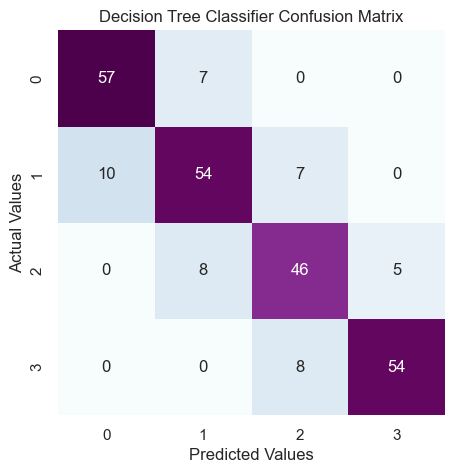

In [48]:
print('Decision Tree Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_dtc))
cm_dtc=my_confusion_matrix(y_test, y_pred_dtc, 'Decision Tree Classifier Confusion Matrix')

# Conclusion

   In this problem, we looked at classification. Classifiers represent the intersection of advanced machine theory and practical application.These algorithms are more than just a sorting mechanism for organizing unlabeled data instances into distinct groupings. Classifiers include a unique set of dynamic rules that include an interpretation mechanism for dealing with ambiguous or unknown values, all of which are suited to the kind of inputs being analysed. Most classifiers also utilize probability estimates, which enable end-users to adjust data categorization using utility functions.
  
  For this problem, we see that SVM Classifier algorithm is best fitted model over other models.